## ARMA

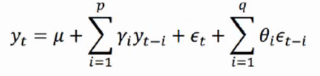

In [2]:
import tushare as ts
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pro = ts.pro_api()
pd.set_option('display.max_rows', 1000)

# Prepare for data

## option info

In [5]:
option_info_all = pro.opt_basic(
    exchange='SSE',
    call_put='C',
    fields='ts_code,name,exercise_price, list_date,delist_date,maturity_date')

option_info_all['period']=pd.to_datetime(option_info_all['delist_date']) - pd.to_datetime(option_info_all['list_date'])

option_info_all[option_info_all['maturity_date'].str.startswith('201806')]

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
41,10001185.SH,华夏上证50ETF期权1806认购3.30,3.300,20180627,20180108,20180627,170 days
51,10001049.SH,华夏上证50ETF期权1806认购2.946,2.946,20180627,20171108,20180627,231 days
221,10001131.SH,华夏上证50ETF期权1806认购2.75,2.750,20180627,20171201,20180627,208 days
227,10001167.SH,华夏上证50ETF期权1806认购2.65,2.650,20180627,20180102,20180627,176 days
228,10001168.SH,华夏上证50ETF期权1806认购3.10,3.100,20180627,20180102,20180627,176 days
249,10001065.SH,华夏上证50ETF期权1806认购3.142,3.142,20180627,20171120,20180627,219 days
268,10001193.SH,华夏上证50ETF期权1806认购3.40,3.400,20180627,20180111,20180627,167 days
296,10001201.SH,华夏上证50ETF期权1806认购3.50,3.500,20180627,20180117,20180627,161 days
309,10001177.SH,华夏上证50ETF期权1806认购3.20,3.200,20180627,20180103,20180627,175 days
320,10001353.SH,华夏上证50ETF期权1806认购2.40,2.400,20180627,20180531,20180627,27 days


## Select one

In [6]:
CODE = "10001025.SH"
option_info_all[option_info_all.ts_code == CODE]

,ts_code,name,exercise_price,maturity_date,list_date,delist_date,period
381,10001025.SH,华夏上证50ETF期权1806认购2.651,2.651,20180627,20171026,20180627,244 days


## Price data

In [7]:
option_price = pro.opt_daily(ts_code=CODE ,fields= 'trade_date, close')

# clean
option_price.index = option_price.trade_date
option_price = option_price.drop(columns='trade_date')
option_price.index = pd.to_datetime(option_price.index)
option_price = option_price.sort_index()
option_price

,close
trade_date,
2017-10-26,0.2382
2017-10-27,0.2613
2017-10-30,0.2533
2017-10-31,0.2519
2017-11-01,0.2432
2017-11-02,0.2468
2017-11-03,0.2497
2017-11-06,0.2376
2017-11-07,0.2620


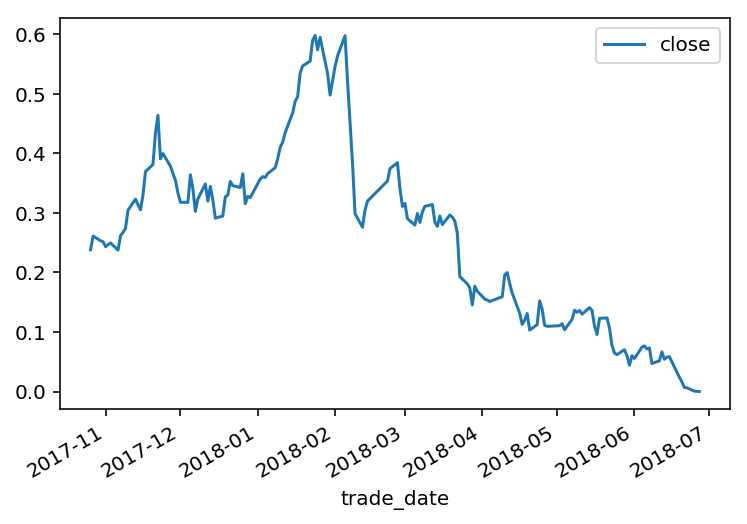

In [8]:
option_price.plot()

## split into Train & Test data

In [9]:
sub = option_price.close
train = sub.loc[:'2019-01']
test = sub.loc['2019-02':]
sub



trade_date
2017-10-26    0.2382
2017-10-27    0.2613
2017-10-30    0.2533
2017-10-31    0.2519
2017-11-01    0.2432
2017-11-02    0.2468
2017-11-03    0.2497
2017-11-06    0.2376
2017-11-07    0.2620
2017-11-08    0.2674
2017-11-09    0.2740
2017-11-10    0.3047
2017-11-13    0.3233
2017-11-14    0.3140
2017-11-15    0.3055
2017-11-16    0.3300
2017-11-17    0.3696
2017-11-20    0.3814
2017-11-21    0.4343
2017-11-22    0.4642
2017-11-23    0.3911
2017-11-24    0.3999
2017-11-27    0.3788
2017-11-28    0.3663
2017-11-29    0.3552
2017-11-30    0.3338
2017-12-01    0.3180
2017-12-04    0.3178
2017-12-05    0.3641
2017-12-06    0.3408
2017-12-07    0.3027
2017-12-08    0.3236
2017-12-11    0.3488
2017-12-12    0.3199
2017-12-13    0.3447
2017-12-14    0.3222
2017-12-15    0.2913
2017-12-18    0.2949
2017-12-19    0.3270
2017-12-20    0.3301
2017-12-21    0.3530
2017-12-22    0.3459
2017-12-25    0.3429
2017-12-26    0.3659
2017-12-27    0.3157
2017-12-28    0.3279
2017-12-29    0.3258
20

trade_date
2017-10-26    0.2382
2017-10-27    0.2613
2017-10-30    0.2533
2017-10-31    0.2519
2017-11-01    0.2432
2017-11-02    0.2468
2017-11-03    0.2497
2017-11-06    0.2376
2017-11-07    0.2620
2017-11-08    0.2674
2017-11-09    0.2740
2017-11-10    0.3047
2017-11-13    0.3233
2017-11-14    0.3140
2017-11-15    0.3055
2017-11-16    0.3300
2017-11-17    0.3696
2017-11-20    0.3814
2017-11-21    0.4343
2017-11-22    0.4642
2017-11-23    0.3911
2017-11-24    0.3999
2017-11-27    0.3788
2017-11-28    0.3663
2017-11-29    0.3552
2017-11-30    0.3338
2017-12-01    0.3180
2017-12-04    0.3178
2017-12-05    0.3641
2017-12-06    0.3408
2017-12-07    0.3027
2017-12-08    0.3236
2017-12-11    0.3488
2017-12-12    0.3199
2017-12-13    0.3447
2017-12-14    0.3222
2017-12-15    0.2913
2017-12-18    0.2949
2017-12-19    0.3270
2017-12-20    0.3301
2017-12-21    0.3530
2017-12-22    0.3459
2017-12-25    0.3429
2017-12-26    0.3659
2017-12-27    0.3157
2017-12-28    0.3279
2017-12-29    0.3258
20

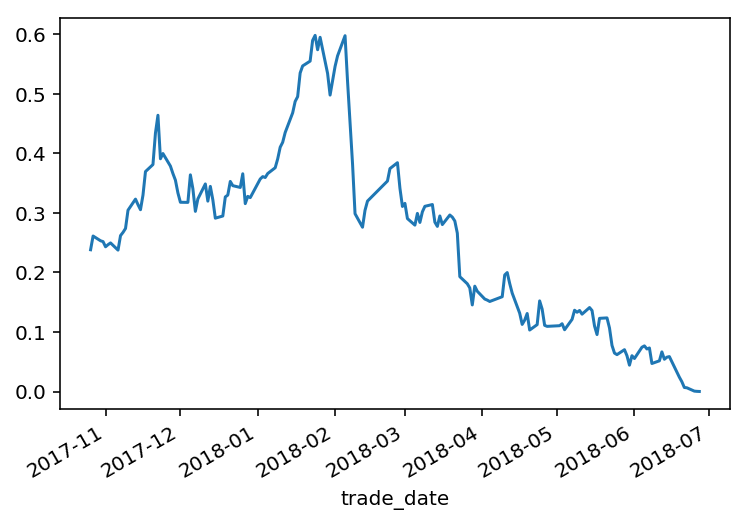

In [10]:
train.plot()
train

In [11]:
print(test)
test.plot()

Series([], Name: close, dtype: float64)


TypeError: Empty 'DataFrame': no numeric data to plot

# Difference

In [12]:
option_price.shape

(164, 1)

In [13]:
option_price['close_diff_1'] = option_price['close'].diff(1)
option_price['close_diff_2'] = option_price['close'].diff(2)

option_price = option_price.dropna()
option_price

,close,close_diff_1,close_diff_2
trade_date,,,
2017-10-30,0.2533,-0.0080,0.0151
2017-10-31,0.2519,-0.0014,-0.0094
2017-11-01,0.2432,-0.0087,-0.0101
2017-11-02,0.2468,0.0036,-0.0051
2017-11-03,0.2497,0.0029,0.0065
2017-11-06,0.2376,-0.0121,-0.0092
2017-11-07,0.2620,0.0244,0.0123
2017-11-08,0.2674,0.0054,0.0298
2017-11-09,0.2740,0.0066,0.0120


## Draw diff

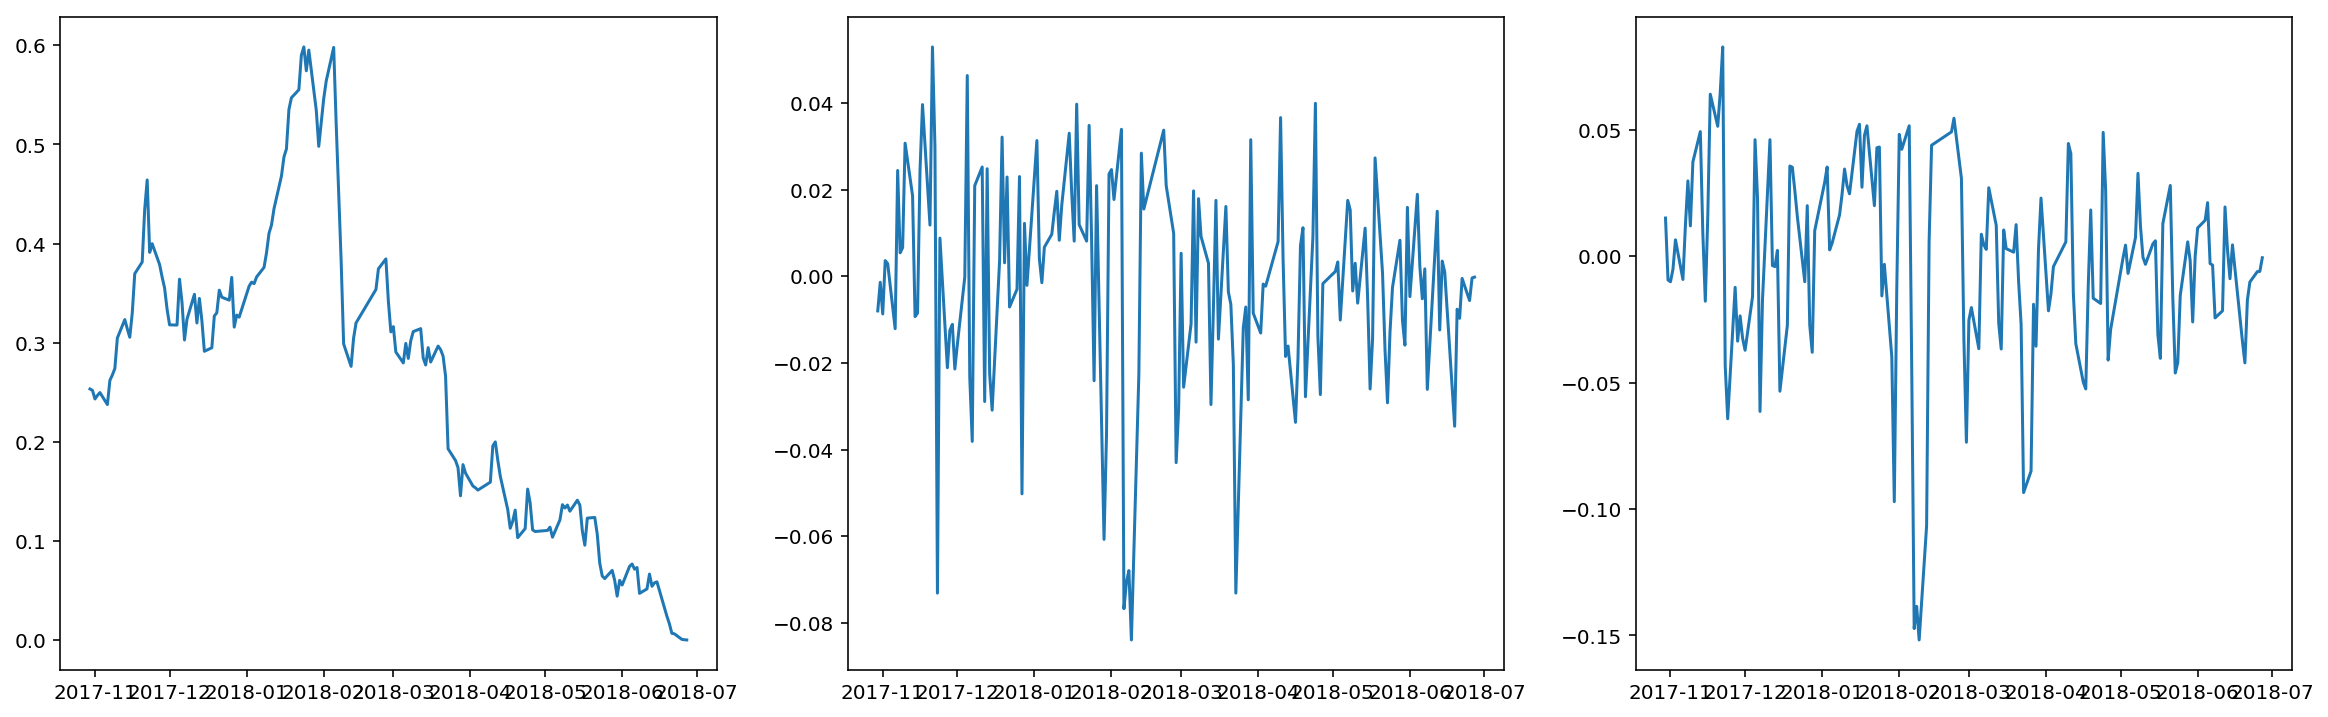

In [14]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(option_price['close'])
ax2 = fig.add_subplot(132)
ax2.plot(option_price['close_diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(option_price['close_diff_2'])
plt.show()

## Test Stationarity

In [101]:
from statsmodels.tsa.stattools import adfuller   #Dickey-Fuller test
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')  #autolag : {‘AIC’, ‘BIC’, ‘t-stat’, None}
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

### origion

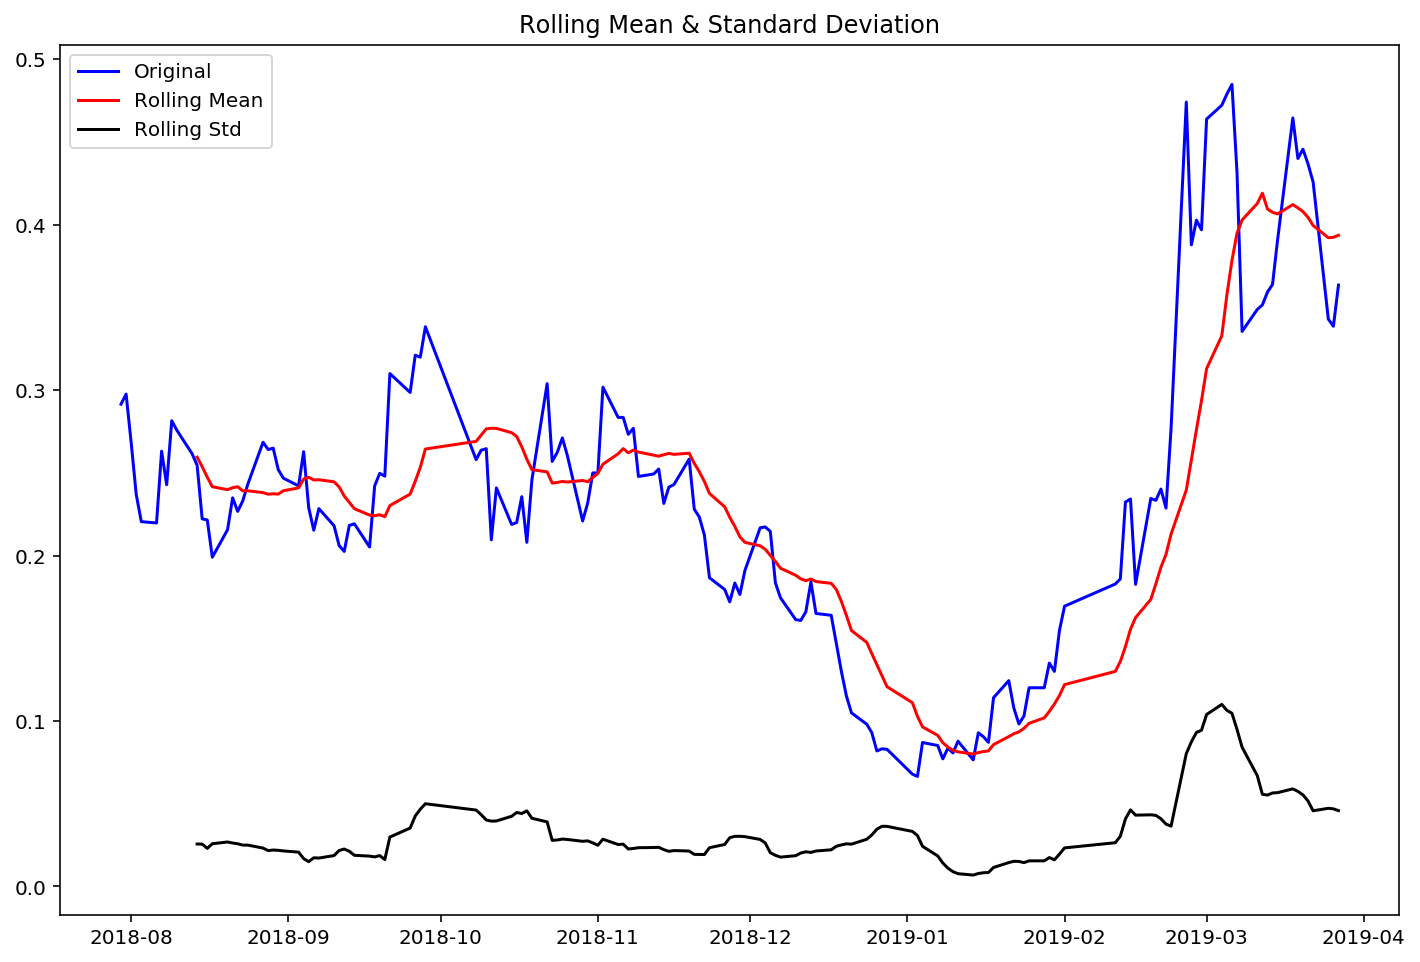

Results of Dickey-Fuller Test:
Test Statistic                  -1.786666
p-value                          0.387102
#Lags Used                       0.000000
Number of Observations Used    159.000000
Critical Value (5%)             -2.879895
Critical Value (1%)             -3.472161
Critical Value (10%)            -2.576557
dtype: float64


In [38]:
test_stationarity(option_price['close'].dropna(inplace=False))

### diff_1

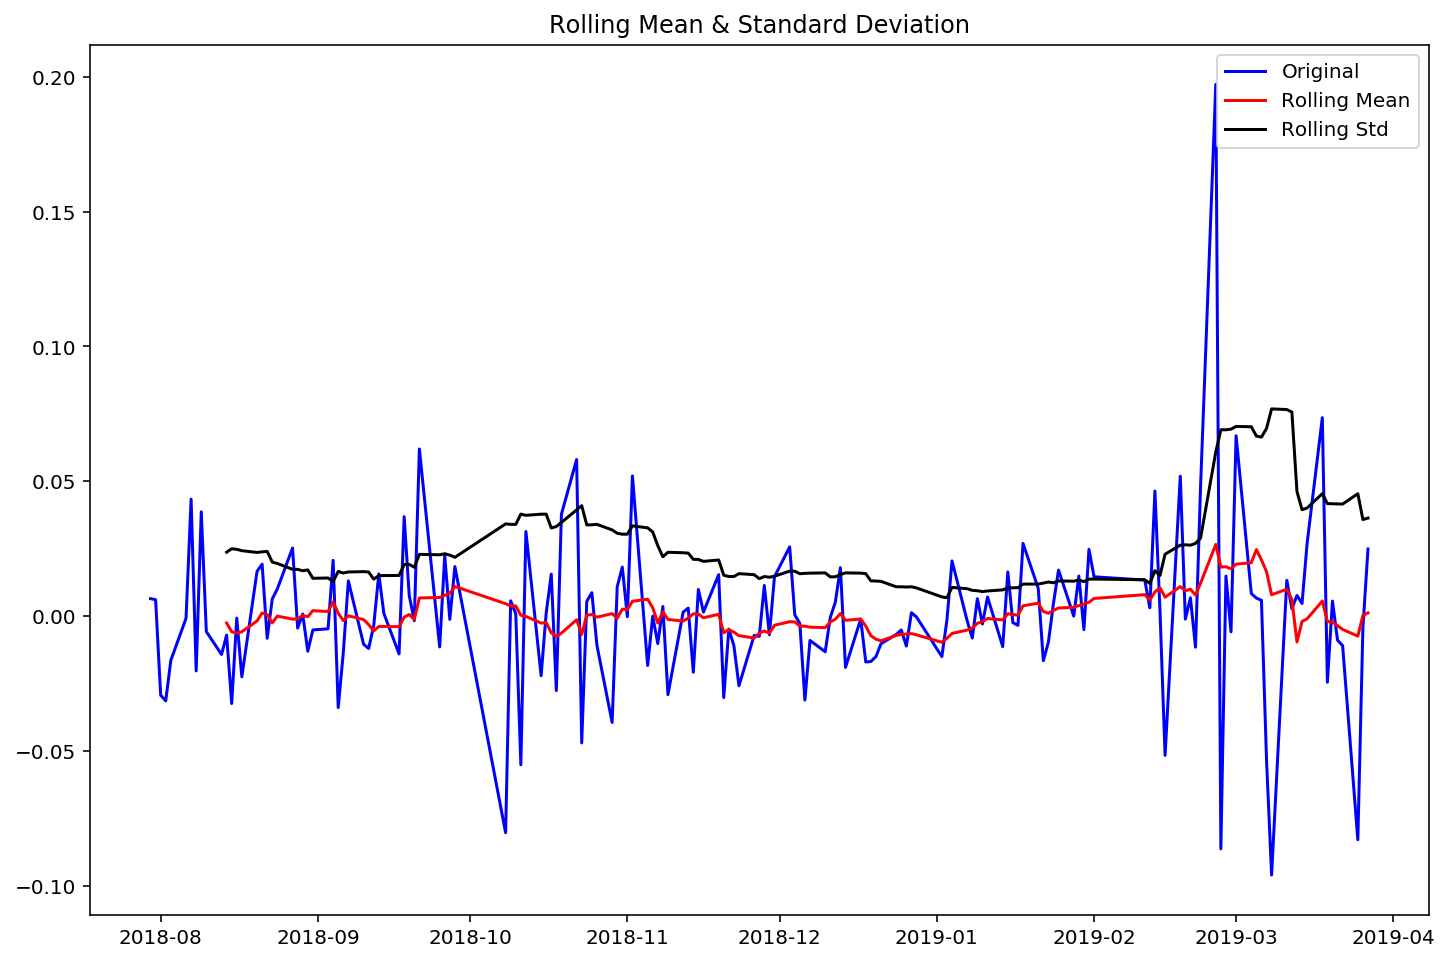

Results of Dickey-Fuller Test:
Test Statistic                -6.625419e+00
p-value                        5.893072e-09
#Lags Used                     5.000000e+00
Number of Observations Used    1.540000e+02
Critical Value (5%)           -2.880498e+00
Critical Value (1%)           -3.473543e+00
Critical Value (10%)          -2.576878e+00
dtype: float64


In [102]:
test_stationarity(option_price['close_diff_1'].dropna(inplace=False))

# Draw Autocorrelation & Partial Autocorrelation

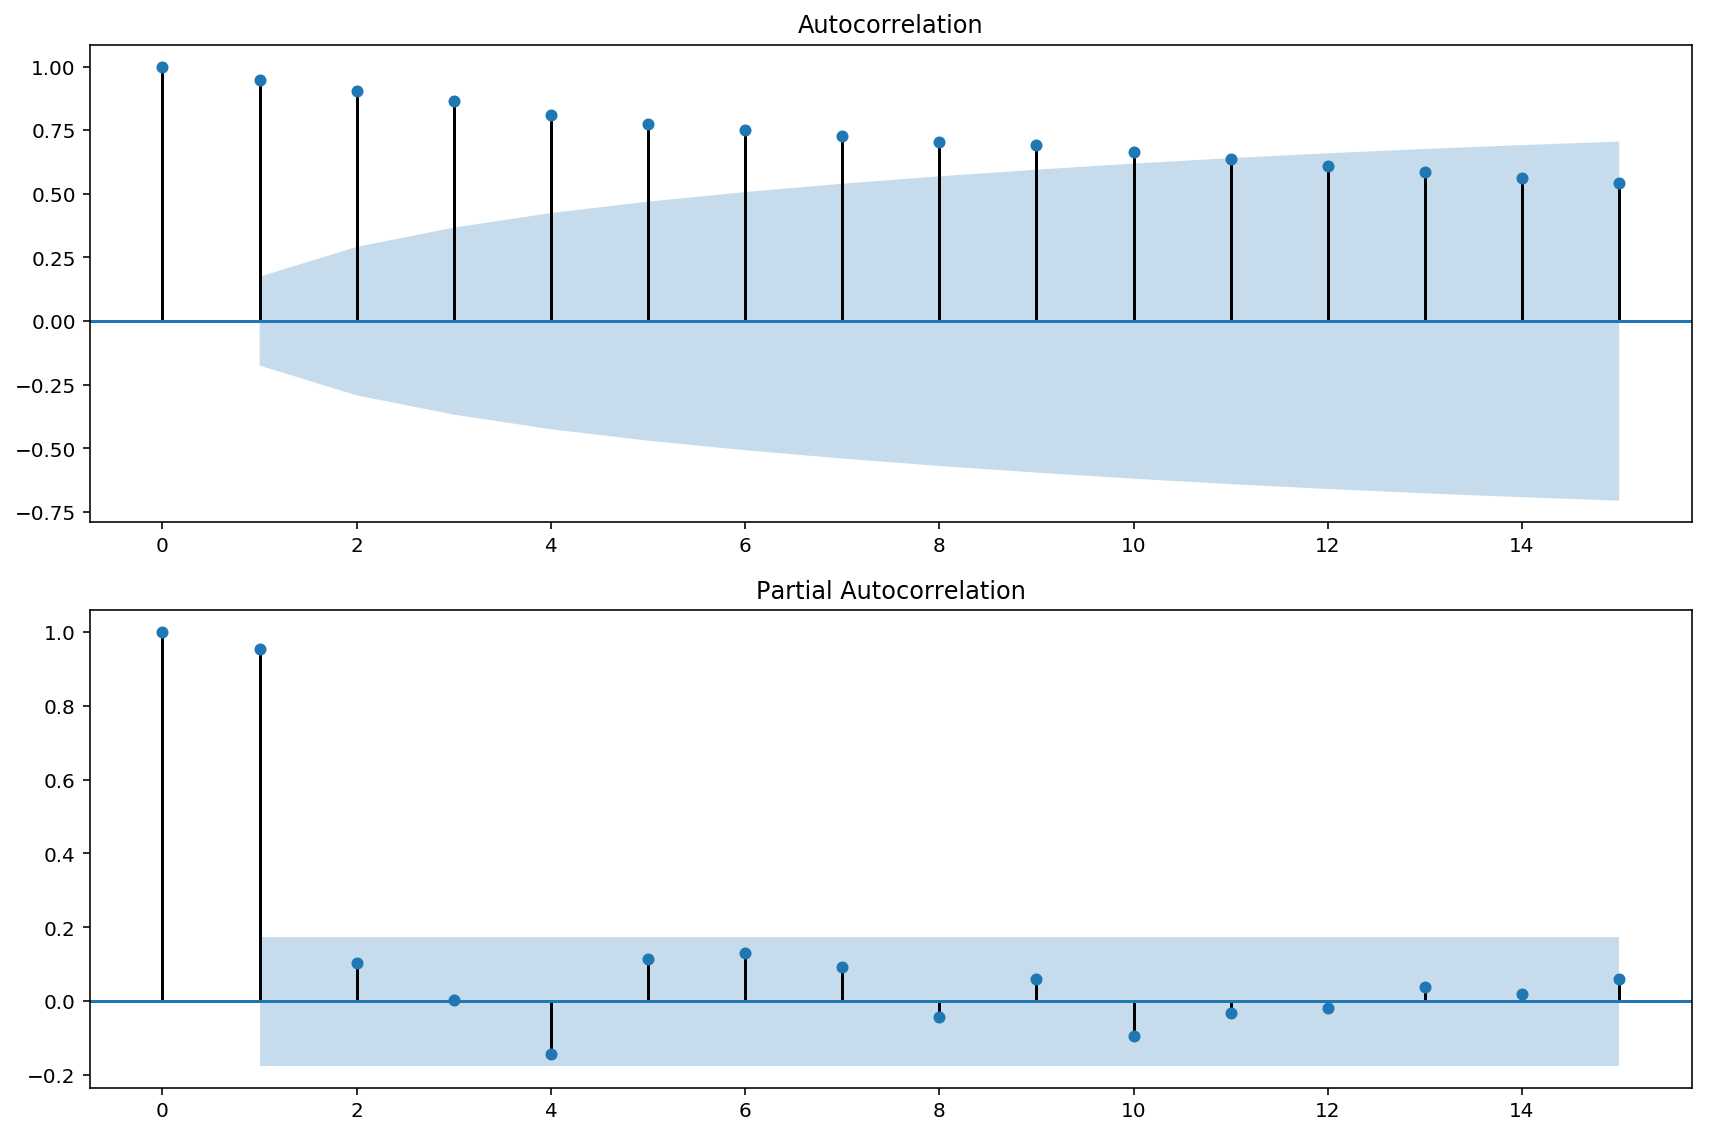

In [105]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(option_price['close'].loc[:'2019-01'], lags=15,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(option_price['close'].loc[:'2019-01'], lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


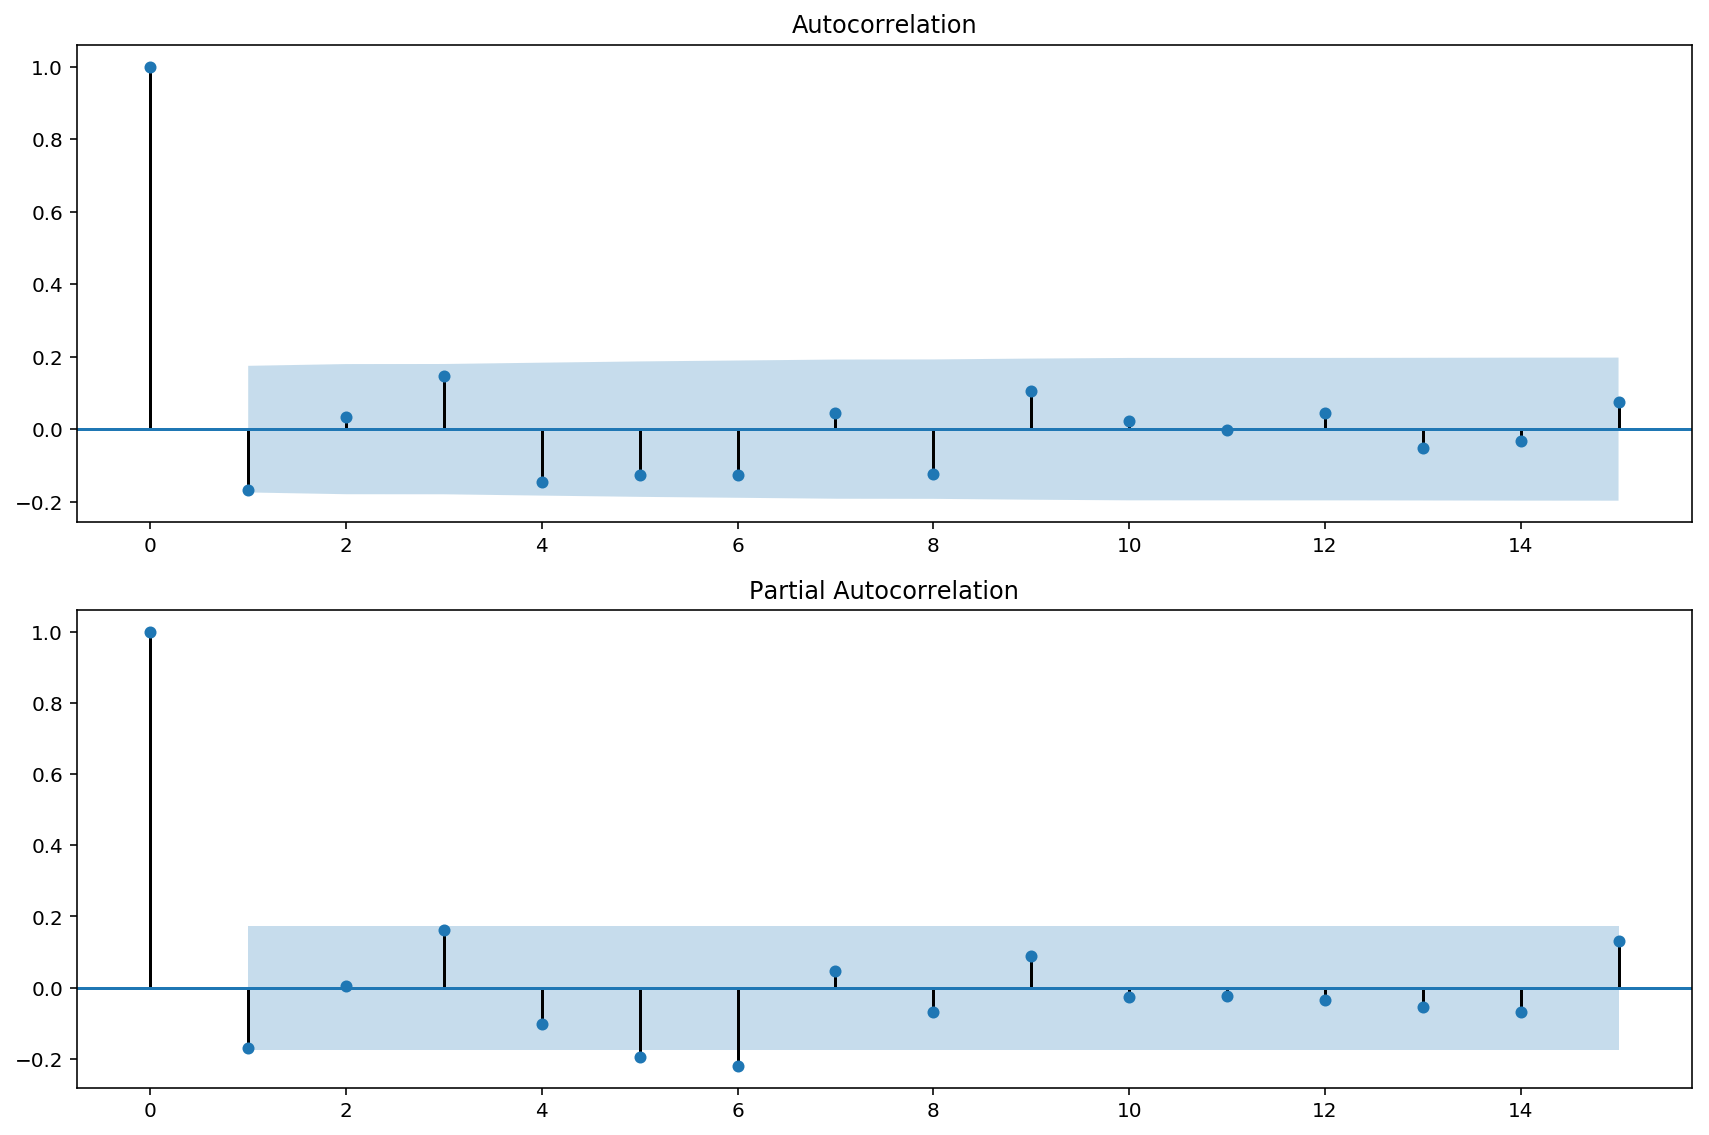

In [103]:
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(option_price['close_diff_1'].loc[:'2019-01'], lags=15,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(option_price['close_diff_1'].loc[:'2019-01'], lags=15, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.show()


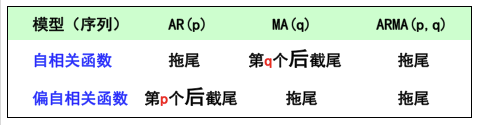

Autocorrelation
    1阶截尾
    
    
Partial Autocorrelation: 
    1阶截尾
    
    
    
ARMA(1,1)

## AIC & BIC

## AIC准则

AIC准则全称为全称是最小化信息量准则（Akaike Information Criterion），计算公式如下：


AIC = =2 *（模型参数的个数）-2ln（模型的极大似然函数）



## BIC准则


AIC准则存在一定的不足之处。


当样本容量很大时，在AIC准则中拟合误差提供的信息就要受到样本容量的放大，而参数个数的惩罚因子却和样本容量没关系（一直是2），因此当样本容量很大时，使用AIC准则选择的模型不收敛与真实模型，它通常比真实模型所含的未知参数个数要多。BIC（Bayesian InformationCriterion）贝叶斯信息准则弥补了AIC的不足，计算公式如下：


BIC = ln(n) * (模型中参数的个数) - 2ln(模型的极大似然函数值)，n是样本容量


In [13]:
import warnings
warnings.filterwarnings("ignore")

In [47]:
train_results = sm.tsa.arma_order_select_ic(option_price['close_diff_1'].loc[:'2019-01'], ic=['aic', 'bic'], trend='nc', max_ar=5, max_ma=5)
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)


('AIC', (3, 4))
('BIC', (1, 0))


## Draw resid


<Figure size 864x576 with 0 Axes>

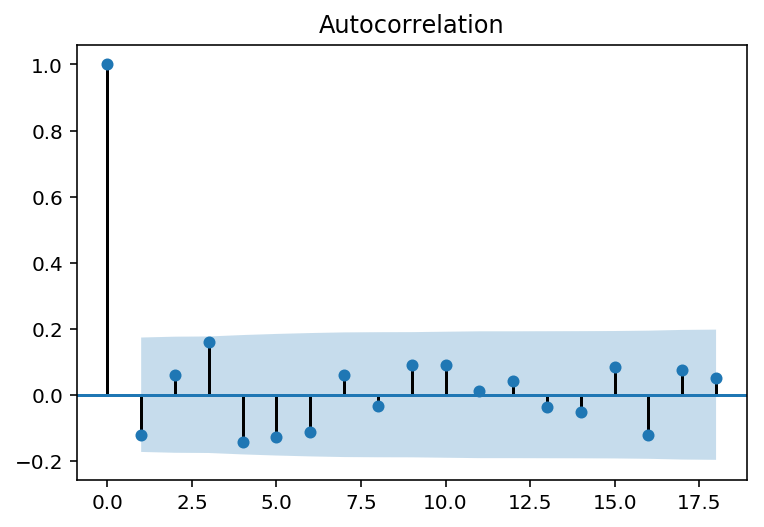

                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2086      0.034      6.064      0.000       0.141       0.276
ar.L1.close     0.9545      0.024     39.068      0.000       0.907       1.002


In [73]:
model = sm.tsa.ARIMA(train, order=(1, 0, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=18)
plt.show()
print(results.summary().tables[1])

<Figure size 864x576 with 0 Axes>

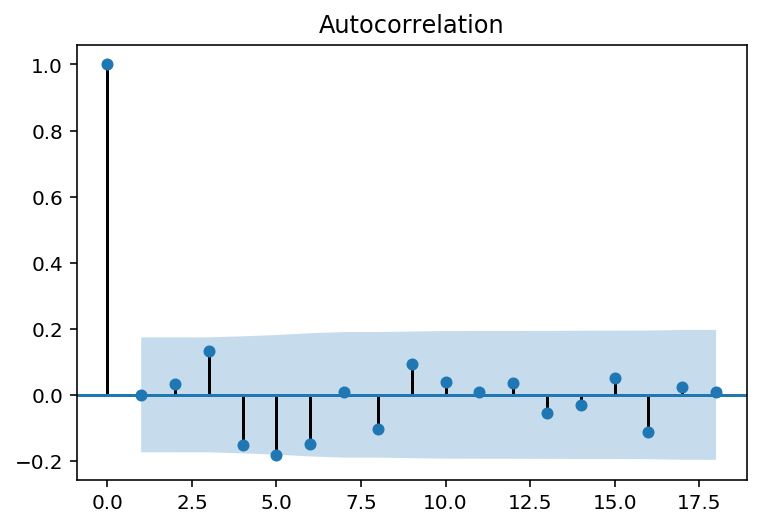

In [78]:
model = sm.tsa.ARIMA(train, order=(1, 1, 0))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=18)
plt.show()


In [79]:
print(results.summary().tables[1])

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0010      0.002     -0.679      0.498      -0.004       0.002
ar.L1.D.close    -0.1683      0.088     -1.920      0.057      -0.340       0.003


In [112]:
model = sm.tsa.ARIMA(sub, order=(1, 0, 0))
results = model.fit()
predict_sunspots = results.predict(start=1,end=150,dynamic=False)
print(predict_sunspots)

trade_date
2018-07-27    0.282378
2018-07-30    0.283425
2018-07-31    0.289611
2018-08-01    0.295418
2018-08-02    0.267529
2018-08-03    0.237642
2018-08-06    0.222032
2018-08-07    0.221271
2018-08-08    0.262580
2018-08-09    0.243258
2018-08-10    0.280093
2018-08-13    0.274668
2018-08-14    0.261152
2018-08-15    0.254489
2018-08-16    0.223650
2018-08-17    0.222984
2018-08-20    0.201568
2018-08-21    0.217368
2018-08-22    0.235738
2018-08-23    0.227934
2018-08-24    0.234025
2018-08-27    0.243639
2018-08-28    0.267720
2018-08-29    0.263532
2018-08-30    0.264293
2018-08-31    0.251919
2018-09-03    0.247065
2018-09-04    0.242592
2018-09-05    0.262294
2018-09-06    0.230028
2018-09-07    0.217083
2018-09-10    0.229552
2018-09-11    0.219653
2018-09-12    0.208231
2018-09-13    0.204900
2018-09-14    0.219843
2018-09-17    0.220795
2018-09-18    0.207469
2018-09-19    0.242592
2018-09-20    0.249825
2018-09-21    0.248207
2018-09-25    0.307220
2018-09-26    0.296369


In [ ]:
def reverse_diff()
    x, x_diff = df['A'].iloc[0], df['B'].iloc[1:]
    df['C'] = np.r_[x, x_diff].cumsum().astype(int)
    


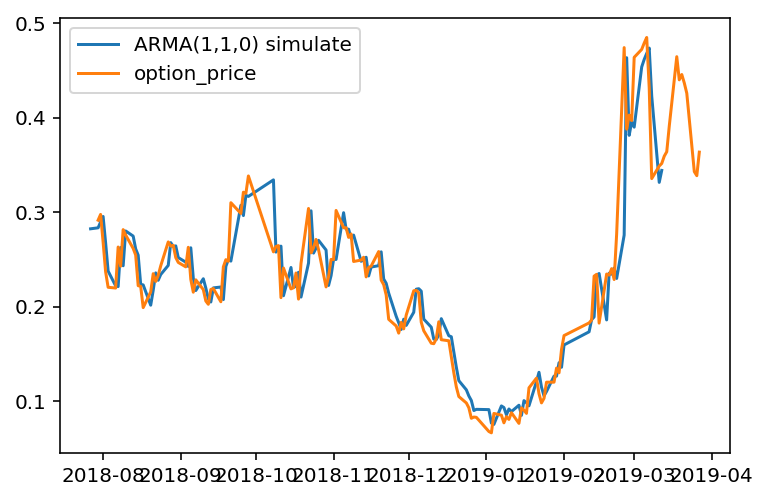

In [113]:
#plt.figure(figsize=(12, 8))
plt.plot(predict_sunspots, label='ARMA(1,1,0) simulate')
plt.plot(option_price['close'], label='option_price')
plt.legend(loc='best')
plt.show()

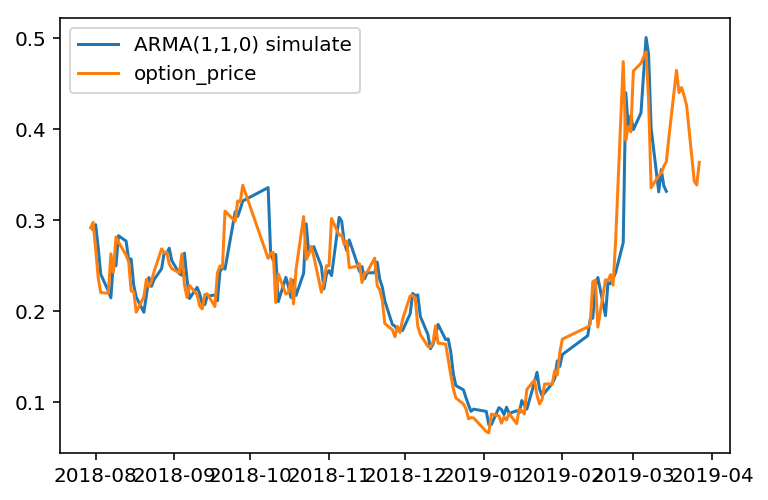

In [170]:
def draw_arima(p,d,q):
    model = sm.tsa.ARIMA(option_price['close'], order=(p,d,q))
    results = model.fit()
    predict_sunspots = results.predict(start=1,end=150,dynamic=False)
    plt.plot(predict_sunspots, label='ARMA(1,1,0) simulate')
    plt.plot(option_price['close'], label='option_price')
    plt.legend(loc='best')
    plt.show()
    return predict_sunspots
    
b = draw_arima(3,0,4)   

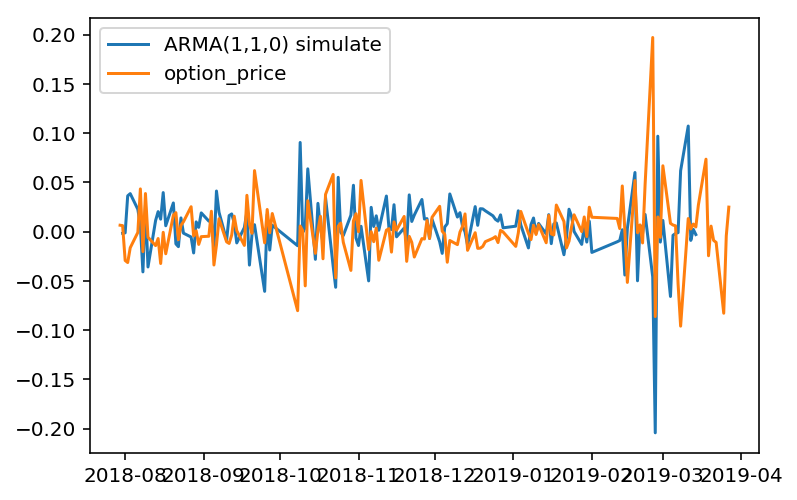

In [175]:
def draw_arima_2(p,d,q):
    model = sm.tsa.ARIMA(option_price['close_diff_1'], order=(p,d,q))
    results = model.fit()
    predict_sunspots = results.predict(start=1,end=150,dynamic=False)
    plt.plot(predict_sunspots*10, label='ARMA(1,1,0) simulate')
    plt.plot(option_price['close_diff_1'], label='option_price')
    plt.legend(loc='best')
    plt.show()
    return predict_sunspots
    
diff_100 = draw_arima_2(1,0,0)   

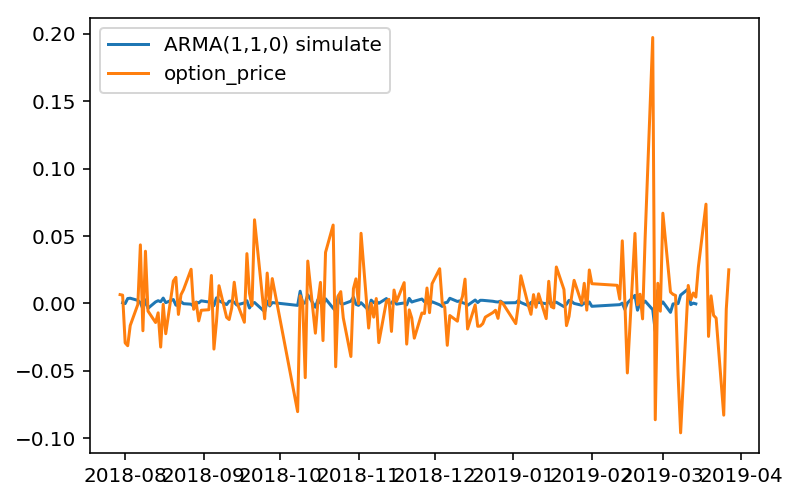

In [164]:
def draw_arima_3(p,d,q):
    model = sm.tsa.ARIMA(option_price['close'], order=(p,d,q))
    results = model.fit()
    predict_sunspots = results.predict(start=1,end=150,dynamic=False)
    plt.plot(predict_sunspots, label='ARMA(1,1,0) simulate')
    plt.plot(option_price['close_diff_1'], label='option_price')
    plt.legend(loc='best')
    plt.show()
    return predict_sunspots
    
origin_110 = draw_arima_3(1,1,0)   

In [167]:
df = pd.DataFrame()

In [168]:
df['diff_100'] = diff_100
df['origin_110'] =origin_110

In [161]:
df['d_f'] = df['b'].diff(1)

In [216]:
sub.index

DatetimeIndex(['2018-07-30', '2018-07-31', '2018-08-01', '2018-08-02',
               '2018-08-03', '2018-08-06', '2018-08-07', '2018-08-08',
               '2018-08-09', '2018-08-10',
               ...
               '2019-03-14', '2019-03-15', '2019-03-18', '2019-03-19',
               '2019-03-20', '2019-03-21', '2019-03-22', '2019-03-25',
               '2019-03-26', '2019-03-27'],
              dtype='datetime64[ns]', name=u'trade_date', length=160, freq=None)

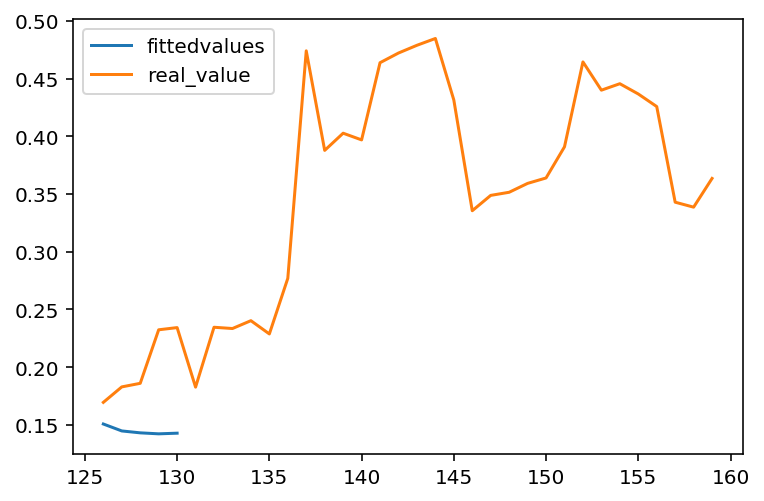

                              ARMA Model Results                              
Dep. Variable:                  close   No. Observations:                  126
Model:                     ARMA(3, 4)   Log Likelihood                 318.188
Method:                       css-mle   S.D. of innovations              0.019
Date:                Tue, 09 Apr 2019   AIC                           -618.376
Time:                        09:16:57   BIC                           -592.849
Sample:                             0   HQIC                          -608.005
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.2052      0.045      4.565      0.000       0.117       0.293
ar.L1.close     2.0518      0.194     10.594      0.000       1.672       2.431
ar.L2.close    -1.5945      0.354     -4.504    

In [242]:
sub = option_price['close']
sub.index = range(160)
train = sub[:126]
test = sub[126:]

from pandas import datetime
# 2018-07-26
# 2019-01-31
# 2019-03-27

model = sm.tsa.ARIMA(train, order=(3,0,4))
results = model.fit()
index_num = len(train)
predict_sunspots = results.predict(start=126,end=130,dynamic=False)
plt.plot(predict_sunspots, label='fittedvalues')
plt.plot(test, label='real_value')
plt.legend(loc='best')
plt.show()
print(results.summary())


array([ 0.15063949,  0.14462454,  0.14297624,  0.14211785,  0.14268281,
        0.14433163,  0.14635595,  0.14818155,  0.14957873,  0.15061402])

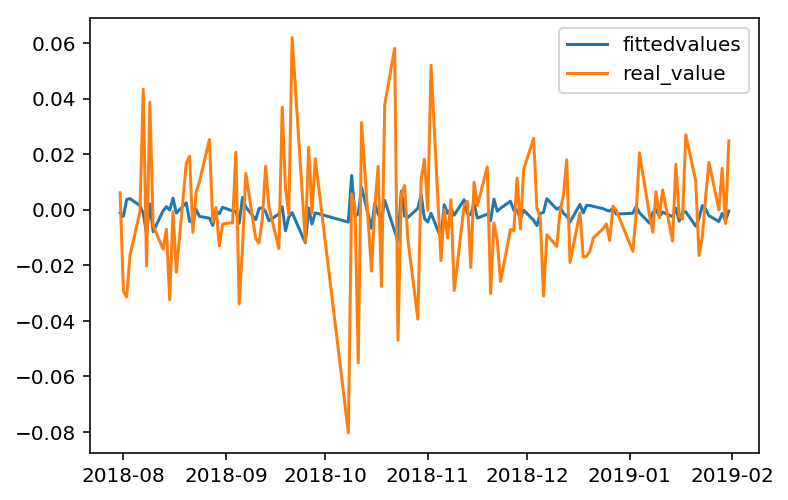

                             ARIMA Model Results                              
Dep. Variable:                D.close   No. Observations:                  125
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 308.876
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 09 Apr 2019   AIC                           -611.752
Time:                        02:06:35   BIC                           -603.267
Sample:                             1   HQIC                          -608.305
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0011      0.002     -0.724      0.471      -0.004       0.002
ar.L1.D.close    -0.1700      0.088     -1.924      0.057      -0.343       0.003
                                    Root

In [199]:
sub = option_price['close']
train = sub.loc[:'2019-01']
test = sub.loc['2019-02':]


model = sm.tsa.ARIMA(train, order=(1,1,0))
results = model.fit()
plt.plot(results.fittedvalues, label='fittedvalues')
plt.plot(train.diff(1), label='real_value')
plt.legend(loc='best')
plt.show()
print(results.summary())

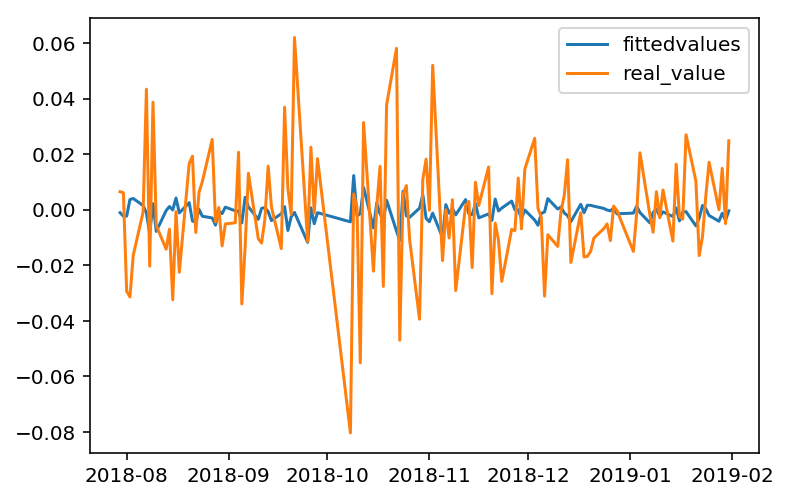

                              ARMA Model Results                              
Dep. Variable:           close_diff_1   No. Observations:                  126
Model:                     ARMA(1, 0)   Log Likelihood                 311.755
Method:                       css-mle   S.D. of innovations              0.020
Date:                Tue, 09 Apr 2019   AIC                           -617.511
Time:                        02:07:07   BIC                           -609.002
Sample:                             0   HQIC                          -614.054
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0011      0.002     -0.689      0.492      -0.004       0.002
ar.L1.close_diff_1    -0.1688      0.088     -1.918      0.057      -0.341       0.004
                    

In [200]:
sub = option_price['close_diff_1']
train = sub.loc[:'2019-01']
test = sub.loc['2019-02':]


model = sm.tsa.ARMA(train, order=(1,0))
results = model.fit()
plt.plot(results.fittedvalues, label='fittedvalues')
plt.plot(train, label='real_value')
plt.legend(loc='best')
plt.show()
print(results.summary())

In [197]:
results.predict(1, 126, dynamic = True)

1     -0.002350
2     -0.000856
3     -0.001108
4     -0.001066
5     -0.001073
6     -0.001072
7     -0.001072
8     -0.001072
9     -0.001072
10    -0.001072
11    -0.001072
12    -0.001072
13    -0.001072
14    -0.001072
15    -0.001072
16    -0.001072
17    -0.001072
18    -0.001072
19    -0.001072
20    -0.001072
21    -0.001072
22    -0.001072
23    -0.001072
24    -0.001072
25    -0.001072
26    -0.001072
27    -0.001072
28    -0.001072
29    -0.001072
30    -0.001072
31    -0.001072
32    -0.001072
33    -0.001072
34    -0.001072
35    -0.001072
36    -0.001072
37    -0.001072
38    -0.001072
39    -0.001072
40    -0.001072
41    -0.001072
42    -0.001072
43    -0.001072
44    -0.001072
45    -0.001072
46    -0.001072
47    -0.001072
48    -0.001072
49    -0.001072
50    -0.001072
51    -0.001072
52    -0.001072
53    -0.001072
54    -0.001072
55    -0.001072
56    -0.001072
57    -0.001072
58    -0.001072
59    -0.001072
60    -0.001072
61    -0.001072
62    -0.001072
63    -0

In [196]:
results.fittedvalues

trade_date
2018-07-30   -0.001072
2018-07-31   -0.002350
2018-08-01   -0.002282
2018-08-02    0.003694
2018-08-03    0.004048
2018-08-06    0.001516
2018-08-07   -0.001118
2018-08-08   -0.008579
2018-08-09    0.002174
2018-08-10   -0.007786
2018-08-13   -0.000290
2018-08-14    0.001145
2018-08-15   -0.000071
2018-08-16    0.004217
2018-08-17   -0.001134
2018-08-20    0.002546
2018-08-21   -0.004055
2018-08-22   -0.004511
2018-08-23    0.000132
2018-08-24   -0.002333
2018-08-27   -0.002958
2018-08-28   -0.005524
2018-08-29   -0.000510
2018-08-30   -0.001388
2018-08-31    0.000942
2018-09-03   -0.000392
2018-09-04   -0.000459
2018-09-05   -0.004747
2018-09-06    0.004470
2018-09-07    0.001043
2018-09-10   -0.003464
2018-09-11    0.000503
2018-09-12    0.000773
2018-09-13   -0.000662
2018-09-14   -0.003903
2018-09-17   -0.001421
2018-09-18    0.001111
2018-09-19   -0.007482
2018-09-20   -0.002536
2018-09-21   -0.000966
2018-09-25   -0.011720
2018-09-26    0.000672
2018-09-27   -0.005051
